# Úkol č. 2 - regrese

* Termíny jsou uvedeny na [courses.fit.cvut.cz/BI-ML1/homeworks/index.html](https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html).
* Pokud odevzdáte úkol po prvním termínu, ale před nejzazším termínem, budete penalizování -12 body, pozdější odevzdání je bez bodu.
* V rámci tohoto úkolu se musíte vypořádat s regresní úlohou, s příznaky různých typů a s chybějícími hodnotami.
* Před tím, než na nich postavíte predikční model, je třeba je nějakým způsobem převést do číselné reprezentace.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budeme strhávat body.

## Zdroj dat

Budeme se zabývat predikcí délky dožití v různých zemích a letech.
K dispozici máte trénovací data v souboru `data.csv` a data na vyhodnocení v souboru `evaluation.csv`.

#### Seznam příznaků:

* Year - Rok
* Status - Status rozvinuté nebo rozvojové země
* Life expectancy - Délka dožití v letech - **cílová proměnná, kterou budete predikovat**
* Adult Mortality - Úmrtnost dospělých bez ohledu na pohlaví (pravděpodobnost, že osoby, které dosáhly věku 15 let, zemřou před dosažením věku 60 let (uvedeno na 1 000 osob)).
* infant deaths - počet zemřelých kojenců na 1000 obyvatel
* Alcohol - Alkohol, zaznamenaná spotřeba na obyvatele (15+) (v litrech čistého alkoholu)
* percentage expenditure - Výdaje na zdravotnictví v procentech hrubého domácího produktu na obyvatele (%)
* Hepatitis B - pokrytí očkováním proti hepatitidě B (HepB) u dětí ve věku 1 roku (%)
* Measles - Spalničky - počet hlášených případů na 1000 obyvatel
* BMI - průměrný index tělesné hmotnosti celé populace
* under-five deaths - počet úmrtí dětí do pěti let na 1000 obyvatel
* Polio - proočkovanost proti dětské obrně (Pol3) u dětí ve věku 1 roku (%)
* Total expenditure - Výdaje vládních institucí na zdravotnictví jako procento celkových vládních výdajů (%)
* Diphtheria - pokrytí očkováním proti záškrtu, tetanu a černému kašli (DTP3) u jednoletých dětí (%)
* HIV/AIDS - počet úmrtí na 1 000 živě narozených dětí na HIV/AIDS (0-4 roky)
* GDP - hrubý domácí produkt na obyvatele (v USD)
* Population - počet obyvatel země
* thinness 1-19 years - podíl dětí ve věku 10-19 let s indexem tělesné hmotnosti (BMI) menším než 2 směrodatné odchylky pod mediánem (%)
* thinness 5-9 years - podíl dětí ve věku 5-9 let s indexem tělesné hmotnosti (BMI) menším než 2 směrodatné odchylky pod mediánem (%)
* Income composition of resources - Index lidského rozvoje z hlediska příjmového složení zdrojů (index v rozmezí 0 až 1)
* Schooling - počet let školní docházky (roky)


## Pokyny k vypracování

**Body zadání**, za jejichž (poctivé) vypracování získáte **25 bodů**: 
  * V notebooku načtěte data ze souboru `data.csv`. Vhodným způsobem si je rozdělte na podmnožiny, které Vám poslouží pro trénování (trénovací), porovnávání modelů (validační) a následnou predikci výkonnosti finálního modelu (testovací).
    
  * Proveďte základní předzpracování dat:
    * Projděte si jednotlivé příznaky a transformujte je do vhodné podoby pro použití ve vybraném regresním modelu.
    * Nějakým způsobem (klidně triviálním) se vypořádejte s chybějícími hodnotami. _Pozor na metodické chyby!_
    * Můžete využívat i vizualizace. Vše stručně ale náležitě komentujte.
<br /><br />
  * Vytvořte **vlastní implementaci náhodného lesa**. Použijte k tomu níže předpřipravenou kostru.
  
  * Na připravená data postupně aplikujte Vaši předchozí implementaci modelu náhodného lesa, dále jeden z modelů **lineární regrese** nebo **hřebenové regrese**, a alespoň jeden další model podle Vašeho uvážení, přičemž pro každý z těchto modelů přiměřeně:
    * Okomentujte vhodnost daného modelu pro daný typ úlohy.
    * Experimentujte s normalizací (standardizace/min-max), pokud pro daný model očekáváte její příznivý vliv.
    * Vyberte si hlavní hyperparametry k ladění a najděte jejich nejlepší hodnoty (vzhledem k RMSE).
    * Pro model s nejlepšími hodnotami hyperparametrů na validační množině určete jeho chybu pomocí RMSE a MAE.
    * Získané výsledky vždy řádně okomentujte.
<br /><br />
  * Ze všech zkoušených možností v předchozím kroku vyberte finální model a správně odhadněte, jakou chybu (RMSE) můžete očekávat na nových datech, která jste doposud neměli k dispozici. _Pozor na metodické chyby!_
    
  * Nakonec načtěte vyhodnocovací data ze souboru `evaluation.csv`. Pomocí finálního modelu napočítejte predikce pro tyto data. Vytvořte soubor `results.csv`, ve kterém získané predikce uložíte do sloupce **Life expectancy** a jednotlivé body identifikujete pomocí sloupců **Country** a **Year** (dodržte názvy sloupců!). Tento soubor též odevzdejte (uložte do repozitáře vedle notebooku).

  * Ukázka, jak by mělo vypadat prvních několik řádků souboru `results.csv` (obecně s jinými hodnotami Life expectancy):
  
```
Country,Year,Life expectancy
Peru,2012,71.4
Peru,2013,72.6
...
```


## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html.

# Homework

## Importing modules & reading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

RND_SEED = 42

We will split data in three parts: training, validation and test with 60%/20%/20% ratios.

In [2]:
from sklearn.model_selection import train_test_split

target_col = 'Life expectancy'
data = pd.read_csv('data.csv')
X = data.drop(columns=[target_col])
y = data[target_col]

Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y, random_state=RND_SEED, test_size=0.4
)


Xval, Xtest, yval, ytest = train_test_split(
    Xtest, ytest, random_state=RND_SEED, test_size=0.5
)

print(f"Number of samples in training set: {Xtrain.shape[0]}")
print(f"Number of samples in validation set: {Xval.shape[0]}")
print(f"Number of features: {Xtrain.shape[1]}")

Number of samples in training set: 1630
Number of samples in validation set: 544
Number of features: 21


In [3]:
Xtrain.head().T

,207,491,2640,792,1670
Country,Belarus,Central African Republic,Vanuatu,Equatorial Guinea,Nepal
Year,2014,2006,2003,2007,2009
Status,Developing,Developing,Developing,Developing,Developing
Adult Mortality,199.0,56.0,173.0,339.0,183.0
infant deaths,0,17,0,3,25
Alcohol,13.94,1.54,1.2,6.86,0.22
percentage expenditure,1147.1114,46.901179,27.298391,1024.519543,6.19357
Hepatitis B,97.0,NaN,64.0,NaN,89.0
Measles,64,3,165,5,189
BMI,61.7,18.6,43.3,2.9,15.9


## Random Forest Implementation

We will implement bootstrap via np.random.randint, we will generate $m$ random integers in range $0$, $\#train_samples$, where $m$ defined by max_samples, and take samples indexed by those random integers. On those bootstraped data we will train single base learner, we will repeat this process for n_estimators time and save each estimator. 

During prediction we will predict each sample by every estimator and put those predictions in matrix, where rows correspond to estimators' predictions. To get final predictions we will take mean along columns.

Last detail, we will include max_depth parameter into kwargs dictionary to pass it altogether to decistion trees.

In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.base import BaseEstimator

class CustomRandomForest(BaseEstimator):
    """
    Třída Vašeho modelu
    Bude se jednat o model náhodného lesa, kde podmodely tvoří rozhodovací stromy pro regresi.
    Pro podmodely můžete použít implementaci DecisionTreeRegressor ze sklearn.
    """
    def __init__(self, n_estimators : int, max_samples : int|float, max_depth : int|None, **kwargs):
        """
        Konstruktor modelu
        Základní hyperparametery:
            n_estimators - počet podmodelů - rozhodovacích stromů.
            max_samples - vyberte si, zda tento parametr bude označovat relativní počet bodů (tj. číslo mezi 0 a 1) 
                          nebo absolutní počet bodů (tj. číslo mezi 1 a velikostí trénovací množiny), 
                          které budou pro každý podmodel rozhodovacího stromu náhodně vybrány z trénovací množiny (bootstrap) a použity k jeho trénování.
            max_depth - maximální hloubka každého z podmodelů rozhodovacího stromu.
            kwargs - (volitelně) případné další hyperparametry, které pošlete do podmodelů rozhodovacího stromu
        """
        if isinstance(max_samples, float) and not (0 < max_samples <= 1):
            raise ValueError("Floating max samples must be in (0, 1] interval")
        self.n_estimators = n_estimators
        self._estimators = [] # not initialiing with list of estimators, so n_estimators can be tweeked by set_params
        self.max_samples = max_samples
        self.kwargs = kwargs
        self.kwargs['max_depth'] = max_depth

    def bootstrap(self, X, y):
        """
            Returns bootstraped data with repsepct to max_samples
        """
        samples = self.max_samples if isinstance(self.max_samples, int) else int(X.shape[0] * self.max_samples)
        iidx = np.random.randint(
            low=0, high=X.shape[0],
            size=(samples,)
        )
        Xres = X.iloc[iidx] if isinstance(X, pd.DataFrame) else X[iidx] # For testing purposes
        yres = y.iloc[iidx] if isinstance(y, pd.Series) else y[iidx]
        return Xres, yres
        
        
    def fit(self, X, y):
        """
        Natrénování modelu. Trénovací data jsou v argumentech X a y.
        Pro trénování podmodelů používejte bootstraping a velikost samplovaného vzorku vezměte z hyperparametru max_samples_fraction
        """
        X = np.array(X)
        y = np.array(y)
        # Cursed code
        self._estimators = [
            DecisionTreeRegressor(**self.kwargs).fit(*self.bootstrap(X, y)) 
            for _ in range(self.n_estimators)
        ]
        return self
        
    def predict(self, X):
        """
        Predikce y v zadaných bodech X
        """
        X = np.array(X)
        matrix = []
        for estimator in self._estimators:
            matrix.append(estimator.predict(X))
        return np.mean(matrix, axis=0)


## Choosing model and preprocessing

We will compare our random forest with ridge regression and try regularization parameter $\lambda = 0$ during hyperparameter search, that way we will get results for linear regression. The third model will be KNN regressor, this model is neither linear nor tree-based, so it will have truly different results.

Due to specifics of our models we will create two different preprocessors: one for random forest and one for ridge and KNN regressors. They will differ in encoding nominal features, random forest can work with ordinally encoded data (it's an ensemble of trees), while other two work better with onehot-encoded nominals.

For both models we will drop features that don't have at least 50% of samples. In other cases we will encode missing nominal as -1 or zero-vector and impute numerical-ordinal data using knn impute fitted on training data.

In [5]:
print(f"Number of columns with 50%+ nulls: {X.columns[Xtrain.notna().mean() < 0.5].shape[0]}")

Number of columns with 50%+ nulls: 0


There is no obsolete features, so we won't drop any columns. Preprocessors will be done with pipeline and other classes provided by scikit-learn. Let's investigate "Country" feature.

In [6]:
nominal_cols = [
    'Country', 'Status'
]

num_ord_cols = list(set(Xtrain.columns) - set(nominal_cols))

In [7]:
from sklearn.pipeline import make_pipeline as pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer

tree_ppr = ColumnTransformer([
    ('nominal_encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-2, encoded_missing_value=-1), nominal_cols),
    ('numord_encoder', KNNImputer(), num_ord_cols)
]).set_output(transform='pandas')

lin_ppr = ColumnTransformer([
    ('nominal_encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False), nominal_cols),
    ('numord_encoder', KNNImputer(), num_ord_cols)
]).set_output(transform='pandas')

Additionaly we will train ridge regression and knn on normalized data, we will try standardization and minmax normalization.

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

std_ppr = ColumnTransformer([
    ('nominal_encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False), nominal_cols),
    ('numord_encoder', pipeline(KNNImputer(), StandardScaler()), num_ord_cols)
]).set_output(transform='pandas')


minmax_ppr = ColumnTransformer([
    ('nominal_encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False), nominal_cols),
    ('numord_encoder', pipeline(KNNImputer(), MinMaxScaler()), num_ord_cols)
]).set_output(transform='pandas')

Now we will pretransform all data, so we will not need to retrain transformers every time we will fit models.

In [9]:
Xtrain_tree = tree_ppr.fit_transform(Xtrain)
Xval_tree = tree_ppr.transform(Xval)

Xtrain_lin = lin_ppr.fit_transform(Xtrain)
Xval_lin = lin_ppr.transform(Xval)

Xtrain_std = std_ppr.fit_transform(Xtrain)
Xval_std = std_ppr.transform(Xval)

Xtrain_minmax = minmax_ppr.fit_transform(Xtrain)
Xval_minmax = minmax_ppr.transform(Xval)

In [10]:
print('Data encoded for random forest')
display(Xtrain_tree.head())
print('Data encoded for linear regression or knn with standardization')
display(Xtrain_std.head())

Data encoded for random forest


,nominal_encoder__Country,nominal_encoder__Status,numord_encoder__Total expenditure,numord_encoder__Measles,numord_encoder__Adult Mortality,numord_encoder__thinness 1-19 years,numord_encoder__Alcohol,numord_encoder__Hepatitis B,numord_encoder__thinness 5-9 years,numord_encoder__Population,...,numord_encoder__under-five deaths,numord_encoder__GDP,numord_encoder__Diphtheria,numord_encoder__BMI,numord_encoder__Polio,numord_encoder__HIV/AIDS,numord_encoder__Income composition of resources,numord_encoder__Year,numord_encoder__Schooling,numord_encoder__percentage expenditure
207,14.0,1.0,5.69,64.0,199.0,1.9,13.94,97.0,2.0,9474511.0,...,0.0,8318.429294,97.0,61.7,97.0,0.1,0.796,2014.0,15.7,1147.111400
491,31.0,1.0,3.99,3.0,56.0,9.6,1.54,73.8,9.6,421758.0,...,26.0,347.673678,51.0,18.6,47.0,10.0,0.323,2006.0,6.0,46.901179
2640,177.0,1.0,4.20,165.0,173.0,1.6,1.20,64.0,1.6,198964.0,...,0.0,158.527240,69.0,43.3,67.0,0.1,0.000,2003.0,10.4,27.298391
792,52.0,1.0,2.25,5.0,339.0,9.5,6.86,90.2,9.5,829327.0,...,4.0,15761.839130,41.0,2.9,54.0,5.9,0.587,2007.0,9.0,1024.519543
1670,113.0,1.0,6.41,189.0,183.0,16.9,0.22,89.0,17.4,2674113.0,...,32.0,48.729900,89.0,15.9,93.0,0.2,0.502,2009.0,10.5,6.193570


Data encoded for linear regression or knn with standardization


,nominal_encoder__Country_Afghanistan,nominal_encoder__Country_Albania,nominal_encoder__Country_Algeria,nominal_encoder__Country_Angola,nominal_encoder__Country_Antigua and Barbuda,nominal_encoder__Country_Argentina,nominal_encoder__Country_Armenia,nominal_encoder__Country_Australia,nominal_encoder__Country_Austria,nominal_encoder__Country_Azerbaijan,...,numord_encoder__under-five deaths,numord_encoder__GDP,numord_encoder__Diphtheria,numord_encoder__BMI,numord_encoder__Polio,numord_encoder__HIV/AIDS,numord_encoder__Income composition of resources,numord_encoder__Year,numord_encoder__Schooling,numord_encoder__percentage expenditure
207,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.277372,0.102490,0.618630,1.201856,0.617480,-0.320742,0.814471,1.548121,1.122400,0.182611
491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.083465,-0.478507,-1.321787,-0.990559,-1.563152,1.599498,-1.372090,-0.224422,-1.752933,-0.360222
2640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.277372,-0.492294,-0.562493,0.265883,-0.690899,-0.320742,-2.865239,-0.889126,-0.448658,-0.369893
792,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.247540,0.645048,-1.743617,-1.789189,-1.257864,0.804247,-0.151684,-0.002855,-0.863655,0.122126
1670,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.038717,-0.500297,0.281166,-1.127903,0.443030,-0.301346,-0.544618,0.440281,-0.419016,-0.380306


## Hyperparameter search

Let's define generic hyperparameter search and display functions. They will be useful, because searching for the best hyperparameter and 

In [11]:
from sklearn.metrics import root_mean_squared_error as RMSE
from sklearn.model_selection import ParameterGrid


def hp_search(Estimator_class, params_grid, Xtrain, Xval, ytrain=ytrain, yval=yval, print_errors=True) -> dict:
    min_val_error = np.float32('+inf')
    min_train_error = np.float32('+inf')
    best_params = {}

    for params in params_grid:
        estimator = Estimator_class(**params).fit(Xtrain, ytrain)
        val_error = RMSE(yval, estimator.predict(Xval))
        if val_error < min_val_error:
            min_val_error = val_error
            min_train_error = RMSE(ytrain, estimator.predict(Xtrain))
            best_params = params
    if print_errors:
        print(f"Training error: {min_train_error:.3f}")
        print(f"Validation error: {min_val_error:.3f}")
    return best_params

In [12]:
from sklearn.metrics import mean_absolute_error as MAE

def display_validation(fitted_estimator, Xval, yval=yval) -> float:
    ypred = fitted_estimator.predict(Xval)
    plt.figure(figsize=(8,8))
    # Create empty plot with blank marker containing the extra label
    plt.plot([], [], ' ', label=f'RMSE: {RMSE(yval, ypred):.5f}')
    plt.plot([], [], ' ', label=f'MAE: {MAE(yval, ypred):.5f}')
    plt.plot([yval.min() * 0.95, yval.max() * 1.05], [yval.min() * 0.95, yval.max() * 1.05], color='red')
    plt.scatter(yval, ypred)
    plt.legend()
    return  RMSE(yval, ypred)

### KNN

K-Nearest neighbors computes (weighted) average of $k$ nearest data points. It might be good for our task, because in our task we expect "similiar" examples (close with respect to some metrics) to have similiar life expectency.

Now let's find the best parameters for KNN, including normalization. We will be deciding number of neighbors, weights and metric for knn, those are the most important hyperparameters for knn as well as normalization.

In [13]:
from sklearn.neighbors import KNeighborsRegressor

params_grid = ParameterGrid(dict(
    n_neighbors=range(1, 15),
    weights=['uniform', 'distance'],
    p=[1, 2],
    n_jobs=[-1]
))

In [14]:
print('No normalization...')
print(hp_search(KNeighborsRegressor, params_grid, Xtrain_lin, Xval_lin))
print()

print('Minmax normalization...')
print(hp_search(KNeighborsRegressor, params_grid, Xtrain_minmax, Xval_minmax))
print()

print('Standardization...')
print(hp_search(KNeighborsRegressor, params_grid, Xtrain_std, Xval_std))

No normalization...
Training error: 0.000
Validation error: 8.993
{'n_jobs': -1, 'n_neighbors': 14, 'p': 1, 'weights': 'distance'}

Minmax normalization...
Training error: 0.000
Validation error: 1.722
{'n_jobs': -1, 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

Standardization...
Training error: 0.000
Validation error: 1.846
{'n_jobs': -1, 'n_neighbors': 2, 'p': 1, 'weights': 'distance'}


Best validation score (lowest error) was with minmax normalization, let's display RMSE, MAE and plot predictions against truth.

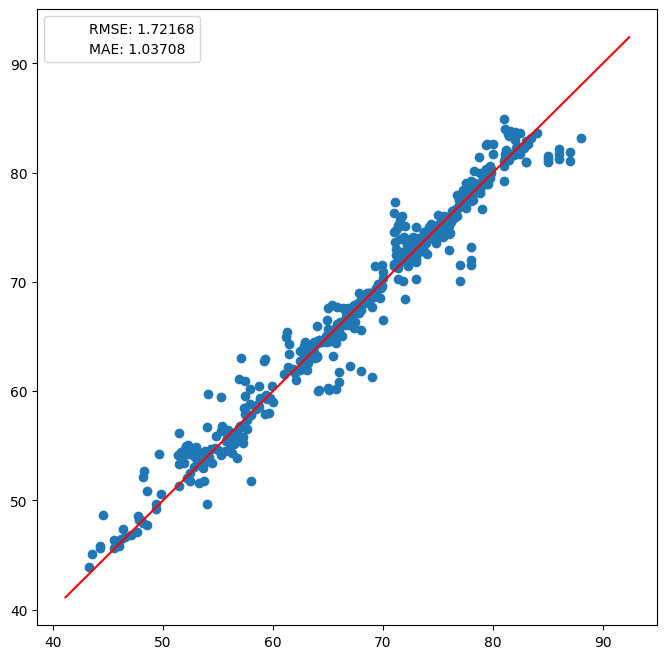

In [15]:
knn_params = {'n_jobs': -1, 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
knn = KNeighborsRegressor(**knn_params)
knn.fit(Xtrain_minmax, ytrain)
knn_rmse = display_validation(knn, Xval_minmax)

KNN showed zero error on training set and a little error on validaion, thus we can conclude that it overfits. Plot above shows similiar results as high density areas tend to be closer to diagonal, where prediction and truth are the same.

### Ridge Regression

Ridge regression is nothing more than regularized linear model, so it might be good if we can model life expectancy as a weighted sum of our features. Using ridge is better than ordinary linear regression, because it is not suffer from colinear functions with proper regularization parameter.

We will procede with ridge regression, it has only regularization parameter alpha, so we will tweak it. Another hyperparameter will be normalization.

Due to continual nature of regularization parameter we will use scipy's optimize function to get these parameter. It will be both faster and more accurate than searching through parameter grid.

In [16]:
from sklearn.linear_model import Ridge
from scipy.optimize import minimize_scalar


def hp_ridge(Xtrain, Xval, ytrain=ytrain, yval=yval, print_errors=True) -> dict:

    def ridge_error(alpha):
        ypred_val = Ridge(alpha, solver='svd').fit(Xtrain, ytrain).predict(Xval)
        return RMSE(yval, ypred_val)
    minimized = minimize_scalar(
        ridge_error,
        bounds=(0, 300), method='bounded'
    )
    alpha0_res = ridge_error(0)
    alpha = 0 if alpha0_res < minimized.fun else minimized.x

    if print_errors:
        ridge = Ridge(alpha, solver='svd').fit(Xtrain, ytrain)
        print(f"Training error: {RMSE(ytrain, ridge.predict(Xtrain)):.5f}")
        print(f"Validation error: {RMSE(yval, ridge.predict(Xval)):.5f}")
        
    return {
        'solver' : 'svd', 'alpha': alpha
    }

In [17]:
print('No normalization...')
print(hp_ridge(Xtrain_lin, Xval_lin))
print()

print('Minmax normalization...')
print(hp_ridge(Xtrain_minmax, Xval_minmax))
print()

print('Standardization...')
print(hp_ridge(Xtrain_std, Xval_std))

No normalization...
Training error: 1.72930
Validation error: 2.12478
{'solver': 'svd', 'alpha': 0.020089916262018986}

Minmax normalization...
Training error: 1.75948
Validation error: 1.77888
{'solver': 'svd', 'alpha': 0.0230027081041268}

Standardization...
Training error: 1.78650
Validation error: 1.97320
{'solver': 'svd', 'alpha': 0.25701765808222526}


Best value is for minmax normalization and $\lambda = 0.0002$, let's display metrics.

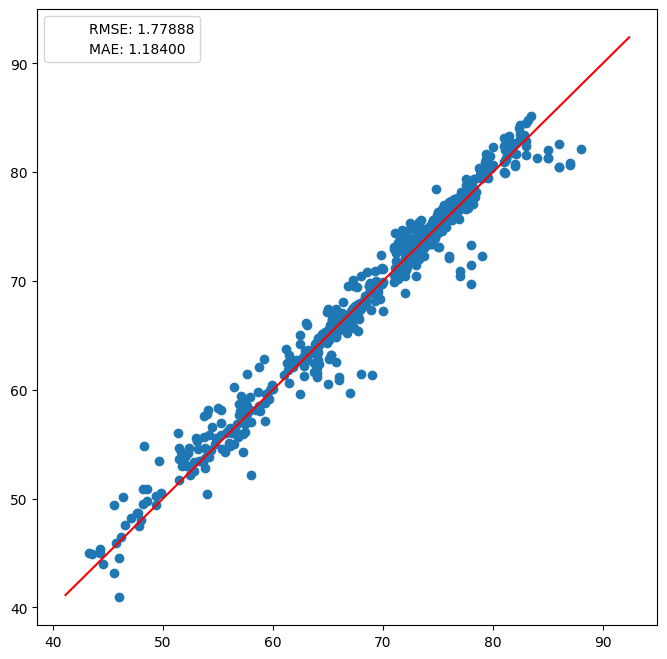

In [18]:
ridge_params = {'solver': 'svd', 'alpha': 0.023002708102066702}
ridge = Ridge(**ridge_params)
ridge.fit(Xtrain_minmax, ytrain)
ridge_rmse = display_validation(ridge, Xval_minmax)

This model performed worse than kNN, though difference between training and validation set is much less, so we can say that model is underfitting. It would be beneficial if we were able to give more flexibility to our model.

#### Ridge Squared

One of the ways that we can introduce more degrees of freedom is to use basis functions. We could create a set of different exponentialial, logarithmic and radial-based features, but to keep things simple and in the domain fast computing we will do a seconf degree polynomial of all numerical and ordinal features. Luckily, there is a PolynomialFeauteres class in scikit-learn, that has implemented that for us.

In [19]:
from sklearn.preprocessing import PolynomialFeatures

squ_ppr = ColumnTransformer([
    ('nominal_encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False), nominal_cols),
    ('numord_encoder', pipeline(KNNImputer(), PolynomialFeatures(2, include_bias=False)), num_ord_cols)
]).set_output(transform='pandas')

std2_ppr = ColumnTransformer([
    ('nominal_encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False), nominal_cols),
    ('numord_encoder', pipeline(KNNImputer(), PolynomialFeatures(2, include_bias=False), StandardScaler()), num_ord_cols)
]).set_output(transform='pandas')


minmax2_ppr = ColumnTransformer([
    ('nominal_encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False), nominal_cols),
    ('numord_encoder', pipeline(KNNImputer(), PolynomialFeatures(2, include_bias=False), MinMaxScaler()), num_ord_cols)
]).set_output(transform='pandas')

In [20]:

Xtrain_squ = squ_ppr.fit_transform(Xtrain)
Xval_squ = squ_ppr.transform(Xval)

Xtrain_std2 = std2_ppr.fit_transform(Xtrain)
Xval_std2 = std2_ppr.transform(Xval)

Xtrain_minmax2 = minmax2_ppr.fit_transform(Xtrain)
Xval_minmax2 = minmax2_ppr.transform(Xval)

In [21]:
print('No normalization, second degree polynomial...')
print(hp_ridge(Xtrain_squ, Xval_squ))
print()

print('Minmax normalization, second degree polynomial...')
print(hp_ridge(Xtrain_minmax2, Xval_minmax2))
print()

print('Standardization, second degree polynomial...')
print(hp_ridge(Xtrain_std2, Xval_std2))

No normalization, second degree polynomial...
Training error: 2.95511
Validation error: 11.67456
{'solver': 'svd', 'alpha': 0}

Minmax normalization, second degree polynomial...
Training error: 1.59537
Validation error: 1.73222
{'solver': 'svd', 'alpha': 0.10610023708650135}

Standardization, second degree polynomial...
Training error: 1.73835
Validation error: 2.31787
{'solver': 'svd', 'alpha': 2.1002039381763953}


We were able to drive RMSE down, but it is still greater than KNN results. Either way, let's plot ourprediction.

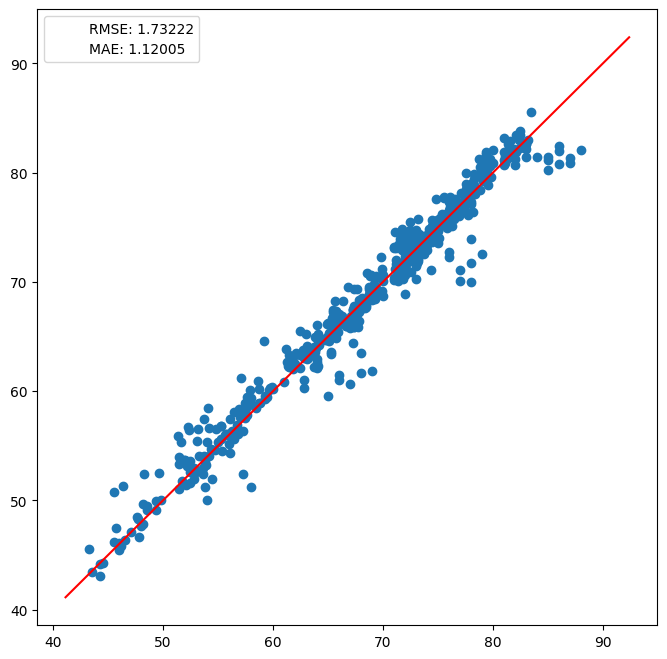

In [22]:
ridge2_params = {'solver': 'svd', 'alpha': 0.10610023708865607}
ridge2 = Ridge(**ridge2_params)
ridge2.fit(Xtrain_minmax2, ytrain)
ridge_rmse = display_validation(ridge2, Xval_minmax2)

We can see, that predictions are generally much better, but some outliers still were able to be horribly mispredicted.

### Random Forest

Random forest can be greate due to its flexibility.

Random forest is an ensemble model, so we have a lot of hyperparameters to work with. Most important ones are definetly n_estimators, max_sampels and max_depth, because they influence a forest directly. Another parameter that we should take into consideration is max_features, as it adds even more variety to the forest.

In [23]:
params_grid = ParameterGrid(dict(
    n_estimators=[10, 50, 100, 200],
    max_samples=[0.33, 0.66, 1.0, 2000],
    max_depth=[7, 11, 16, None],
    max_features=['sqrt', 0.5, 1.0]
))

In [24]:
hp_search(CustomRandomForest, params_grid, Xtrain_tree, Xval_tree)

Training error: 0.596
Validation error: 1.808


{'max_depth': None,
 'max_features': 0.5,
 'max_samples': 2000,
 'n_estimators': 100}

Now let's evaluate random forest with these parameters.

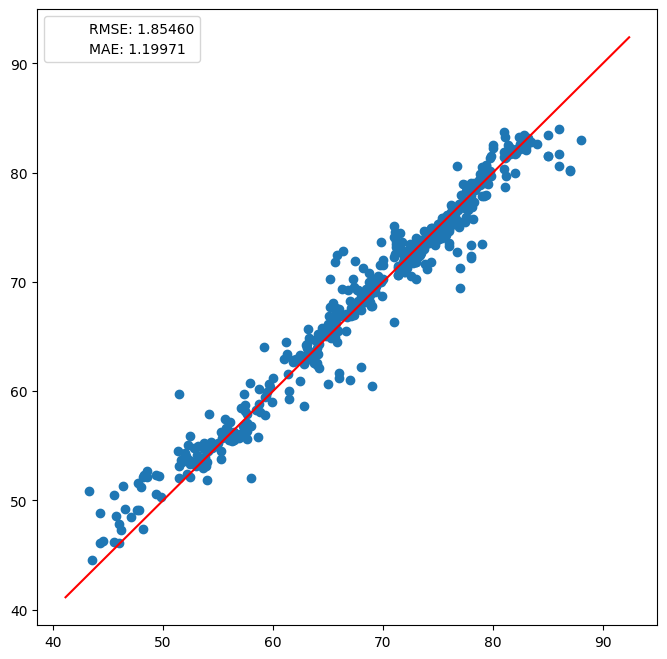

In [25]:
crf_params = {
    'max_depth': 16,
    'max_features': 0.5,
    'max_samples': 2000,
    'n_estimators': 200
}

crf = CustomRandomForest(**crf_params)
crf.fit(Xtrain_tree, ytrain)
crf_rmse = display_validation(crf, Xval_tree)

We obtain result that is worse than ridge regression, it could happen due to additive nature of target value, because trees are bad at predicting values that highly depend on interactions. Another peculiarity is that we obtained different RMSE during hyperparameter search and final evaluation. This is result of bootstrap, because it is random we got different trees, that predicted different values. In bootstrap method we use np.random.randint, which cannot be seeded, so this is an inherent flaw of our implementation.

## Final model & Submission

We got the best results for KNN regressor with *knn_params* as hyperparameters and using minmax normalization, now we will use obtained knowledge for our final model.

In [26]:
from sklearn.base import clone

model = pipeline(
    clone(minmax_ppr),
    KNeighborsRegressor(**knn_params)
)

model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('nominal_encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Country', 'Status']),
                                                 ('numord_encoder',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Total expenditure',
                                                   'Measles', 'Adult Mortality',
                                                   'thinness  1-19 years',
                                                   'Alcohol', 'Hepatitis B',
                                                   'thinness 5-9 years',
                                                   'Population',
                                                   'infant deaths',
                                                   'under-five deaths', 'GDP',
                                                   'Diphtheria', 'BMI', 'Polio',
                                                   'HIV/AIDS',
                                                   'Income composition of '
                                                   'resources',
                                                   'Year', 'Schooling',
                                                   'percentage '
                                                   'expenditure'])])),
                ('kneighborsregressor',
                 KNeighborsRegressor(n_jobs=-1, n_neighbors=3, p=1,
                                     weights='distance'))])

Let's know merge training and validation dataset into dataset, which our final model will be fitted on.

In [27]:
Xfinal = pd.concat([Xtrain, Xval])
yfinal = pd.concat([ytrain, yval])

Xfinal

,Country,Year,Status,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
207,Belarus,2014,Developing,199.0,0,13.94,1147.111400,97.0,64,61.7,...,97.0,5.69,97.0,0.1,8318.429294,9474511.0,1.9,2.0,0.796,15.7
491,Central African Republic,2006,Developing,56.0,17,1.54,46.901179,NaN,3,18.6,...,47.0,3.99,51.0,10.0,347.673678,421758.0,9.6,9.6,0.323,6.0
2640,Vanuatu,2003,Developing,173.0,0,1.20,27.298391,64.0,165,43.3,...,67.0,4.20,69.0,0.1,158.527240,198964.0,1.6,1.6,0.000,10.4
792,Equatorial Guinea,2007,Developing,339.0,3,6.86,1024.519543,NaN,5,2.9,...,54.0,2.25,41.0,5.9,15761.839130,829327.0,9.5,9.5,0.587,9.0
1670,Nepal,2009,Developing,183.0,25,0.22,6.193570,89.0,189,15.9,...,93.0,6.41,89.0,0.2,48.729900,2674113.0,16.9,17.4,0.502,10.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161,Ireland,2006,Developed,78.0,0,13.44,9126.931178,NaN,87,55.8,...,91.0,7.22,91.0,0.1,54326.971300,4273591.0,0.3,0.2,0.896,17.6
252,Belize,2001,Developing,21.0,0,4.90,251.658693,96.0,0,41.4,...,96.0,4.50,96.0,0.4,3419.275719,254984.0,3.7,3.7,0.677,11.8
507,Chad,2006,Developing,414.0,45,0.41,62.672260,NaN,1594,15.7,...,49.0,3.32,4.0,5.1,712.184769,1421597.0,1.3,1.2,0.303,5.5
591,Costa Rica,2012,Developing,97.0,1,3.34,2568.237059,91.0,0,57.5,...,9.0,9.56,91.0,0.1,9985.369590,4654122.0,1.8,1.7,0.758,13.6


Now we can train our model and evaluate our model on test dataset to estimate possible error on evaluation dataset.

In [28]:
model.fit(Xfinal, yfinal)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('nominal_encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['Country', 'Status']),
                                                 ('numord_encoder',
                                                  Pipeline(steps=[('knnimputer',
                                                                   KNNImputer()),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['Total expenditure',
                                                   'Measles', 'Adult Mortality',
                                                   'thinness  1-19 years',
                                                   'Alcohol', 'Hepatitis B',
                                                   'thinness 5-9 years',
                                                   'Population',
                                                   'infant deaths',
                                                   'under-five deaths', 'GDP',
                                                   'Diphtheria', 'BMI', 'Polio',
                                                   'HIV/AIDS',
                                                   'Income composition of '
                                                   'resources',
                                                   'Year', 'Schooling',
                                                   'percentage '
                                                   'expenditure'])])),
                ('kneighborsregressor',
                 KNeighborsRegressor(n_jobs=-1, n_neighbors=3, p=1,
                                     weights='distance'))])

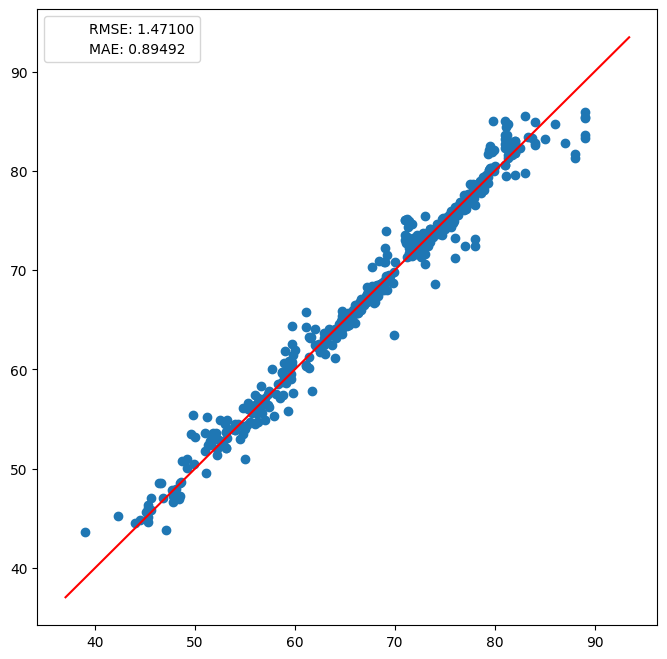

In [29]:
model.fit(Xfinal, yfinal)
final_rmse = display_validation(model, Xtest, ytest)

On evaluation we can expect RMSE to be 1.5 years and MAE to be approximatly 1 year, on the first look. Thouse errors are better than we were able to obtain on validation dataset, so we will estimate root mean square error to be closer to 1.7 years.

In [30]:
eval_df = pd.read_csv('evaluation.csv')

sub = pd.DataFrame({
    'Country' : eval_df['Country'],
    'Year' : eval_df['Year'],
    target_col : model.predict(eval_df)
})

sub.to_csv('results.csv', index=False)
display(sub)

,Country,Year,Life expectancy
0,Albania,2015,75.184693
1,Albania,2014,75.142418
2,Albania,2013,75.252653
3,Albania,2012,75.295092
4,Albania,2011,75.400505
...,...,...,...
205,Zambia,2014,55.305332
206,Zambia,2013,55.279761
207,Zambia,2012,56.797081
208,Zambia,2011,55.414181
